In [89]:
import pandas as pd
import yfinance as yf

In [90]:
df_pmi=pd.read_excel(r"C:\Users\malu\Documents\Recherche quant\PMI_Histo.xlsx")
df_pmi=df_pmi.rename(columns={'PMI manufacturing':'PMI'})
df_pmi

,DATE,PMI
0,1999-01-01,48.191608
1,1999-02-01,49.331907
2,1999-03-01,50.251730
3,1999-04-01,51.222043
4,1999-05-01,51.391622
...,...,...
315,2025-04-01,48.600000
316,2025-05-01,49.000000
317,2025-06-01,49.400000
318,2025-07-01,49.400000


In [91]:
import yfinance as yf
import pandas as pd

# Télécharger les données quotidiennes du S&P 500 (^GSPC)
sp500 = yf.download('^GSPC', start='1999-01-01', end='2025-08-01')

# Calculer la moyenne mensuelle
monthly_avg = sp500['Close'].resample('M').mean()

# Transformer en DataFrame propre
df_mensuel = monthly_avg.reset_index()
df_mensuel.columns = ['DATE', 'SPX_avg']

# Garder seulement janvier 1999 à juillet 2025
df_mensuel = df_mensuel[(df_mensuel['DATE'] >= '1999-01-01') & (df_mensuel['DATE'] <= '2025-07-31')]

df_mensuel


C:\Users\malu\AppData\Local\Temp\ipykernel_12968\3129928148.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start='1999-01-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\malu\AppData\Local\Temp\ipykernel_12968\3129928148.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = sp500['Close'].resample('M').mean()


,DATE,SPX_avg
0,1999-01-31,1248.774735
1,1999-02-28,1246.582115
2,1999-03-31,1281.663914
3,1999-04-30,1334.756662
4,1999-05-31,1332.074011
...,...,...
314,2025-03-31,5683.983352
315,2025-04-30,5369.495722
316,2025-05-31,5810.919480
317,2025-06-30,6029.951514


In [92]:
df_mensuel['DATE'] = pd.to_datetime(df_mensuel['DATE'])
df_mensuel['DATE'] = df_mensuel['DATE'].dt.strftime('%Y-%m')
df_mensuel

,DATE,SPX_avg
0,1999-01,1248.774735
1,1999-02,1246.582115
2,1999-03,1281.663914
3,1999-04,1334.756662
4,1999-05,1332.074011
...,...,...
314,2025-03,5683.983352
315,2025-04,5369.495722
316,2025-05,5810.919480
317,2025-06,6029.951514


In [93]:
df_pmi['DATE'] = pd.to_datetime(df_pmi['DATE'])
df_pmi['DATE'] = df_pmi['DATE'].dt.strftime('%Y-%m')
df_pmi

,DATE,PMI
0,1999-01,48.191608
1,1999-02,49.331907
2,1999-03,50.251730
3,1999-04,51.222043
4,1999-05,51.391622
...,...,...
315,2025-04,48.600000
316,2025-05,49.000000
317,2025-06,49.400000
318,2025-07,49.400000


In [94]:
df_final = df_pmi.merge(df_mensuel, on='DATE', how='left')
df_final=df_final.dropna()
df_final


,DATE,PMI,SPX_avg
0,1999-01,48.191608,1248.774735
1,1999-02,49.331907,1246.582115
2,1999-03,50.251730,1281.663914
3,1999-04,51.222043,1334.756662
4,1999-05,51.391622,1332.074011
...,...,...,...
314,2025-03,47.600000,5683.983352
315,2025-04,48.600000,5369.495722
316,2025-05,49.000000,5810.919480
317,2025-06,49.400000,6029.951514


In [95]:
# Télécharger les taux 10 ans US (^TNX)
taux10 = yf.download('^TNX', start='1999-01-01', end='2025-08-01')

# Calcul des moyennes mensuelles
taux10_mensuel = taux10['Close'].resample('M').mean().reset_index()
taux10_mensuel.columns = ['DATE', 'TAUX10Y']

# Transformer DATE en YYYY-MM
taux10_mensuel['DATE'] = pd.to_datetime(taux10_mensuel['DATE']).dt.strftime('%Y-%m')

# Fusion avec ton DataFrame existant
df = df_final.merge(taux10_mensuel, on='DATE', how='left')

# Supprimer les lignes incomplètes si besoin
df = df.dropna()

df

C:\Users\malu\AppData\Local\Temp\ipykernel_12968\3000718115.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  taux10 = yf.download('^TNX', start='1999-01-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed
C:\Users\malu\AppData\Local\Temp\ipykernel_12968\3000718115.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  taux10_mensuel = taux10['Close'].resample('M').mean().reset_index()


,DATE,PMI,SPX_avg,TAUX10Y
0,1999-01,48.191608,1248.774735,4.711105
1,1999-02,49.331907,1246.582115,4.987474
2,1999-03,50.251730,1281.663914,5.218478
3,1999-04,51.222043,1334.756662,5.165190
4,1999-05,51.391622,1332.074011,5.527550
...,...,...,...,...
314,2025-03,47.600000,5683.983352,4.277762
315,2025-04,48.600000,5369.495722,4.272048
316,2025-05,49.000000,5810.919480,4.427238
317,2025-06,49.400000,6029.951514,4.381450


In [96]:
df['PMI_return (%)'] = df['PMI'].pct_change() * 100
df['SPX_avg_return (%)'] = df['SPX_avg'].pct_change() * 100
df['TAUX10Y_return (%)'] = df['TAUX10Y'].pct_change() * 100
df=df.dropna()
df


,DATE,PMI,SPX_avg,TAUX10Y,PMI_return (%),SPX_avg_return (%),TAUX10Y_return (%)
1,1999-02,49.331907,1246.582115,4.987474,2.366177,-0.175582,5.866317
2,1999-03,50.251730,1281.663914,5.218478,1.864560,2.814239,4.631695
3,1999-04,51.222043,1334.756662,5.165190,1.930905,4.142486,-1.021137
4,1999-05,51.391622,1332.074011,5.527550,0.331065,-0.200984,7.015415
5,1999-06,52.436514,1322.552734,5.888727,2.033196,-0.714771,6.534129
...,...,...,...,...,...,...,...
314,2025-03,47.600000,5683.983352,4.277762,2.145923,-5.873900,-3.840951
315,2025-04,48.600000,5369.495722,4.272048,2.100840,-5.532874,-0.133580
316,2025-05,49.000000,5810.919480,4.427238,0.823045,8.220954,3.632695
317,2025-06,49.400000,6029.951514,4.381450,0.816327,3.769318,-1.034236


In [97]:
# Moyennes mobiles sur 3 mois
df['PMI_return_MA_3'] = df['PMI_return (%)'].rolling(window=3).mean()
df['SPX_return_MA_3'] = df['SPX_avg_return (%)'].rolling(window=3).mean()
df['TAUX10Y_return_MA_3'] = df['TAUX10Y_return (%)'].rolling(window=3).mean()

# Moyennes mobiles sur 6 mois
df['PMI_return_MA_6'] = df['PMI_return (%)'].rolling(window=6).mean()
df['SPX_return_MA_6'] = df['SPX_avg_return (%)'].rolling(window=6).mean()
df['TAUX10Y_return_MA_6'] = df['TAUX10Y_return (%)'].rolling(window=6).mean()
df=df.dropna()
df

C:\Users\malu\AppData\Local\Temp\ipykernel_12968\563648079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PMI_return_MA_3'] = df['PMI_return (%)'].rolling(window=3).mean()
C:\Users\malu\AppData\Local\Temp\ipykernel_12968\563648079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPX_return_MA_3'] = df['SPX_avg_return (%)'].rolling(window=3).mean()
C:\Users\malu\AppData\Local\Temp\ipykernel_12968\563648079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,DATE,PMI,SPX_avg,TAUX10Y,PMI_return (%),SPX_avg_return (%),TAUX10Y_return (%),PMI_return_MA_3,SPX_return_MA_3,TAUX10Y_return_MA_3,PMI_return_MA_6,SPX_return_MA_6,TAUX10Y_return_MA_6
6,1999-07,53.698159,1380.990002,5.777048,2.406044,4.418521,-1.896498,1.590101,1.167589,3.884349,1.821991,1.713985,3.521654
7,1999-08,54.484217,1327.488653,5.931409,1.463845,-3.874130,2.671978,1.967695,-0.056793,2.436536,1.671603,1.097560,2.989264
8,1999-09,55.550755,1318.171904,5.902905,1.957518,-0.701833,-0.480566,1.942469,-0.052481,0.098305,1.687095,0.511548,2.137220
9,1999-10,57.090458,1300.010010,6.099050,2.771704,-1.377809,3.322860,2.064356,-1.984591,1.838091,1.827229,-0.408501,2.861220
10,1999-11,57.324011,1391.002848,6.018850,0.409093,6.999395,-1.314958,1.712771,1.639918,0.509112,1.840233,0.791562,1.472824
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2025-03,47.600000,5683.983352,4.277762,2.145923,-5.873900,-3.840951,1.741287,-1.802183,-0.776785,1.025019,0.229642,2.490710
315,2025-04,48.600000,5369.495722,4.272048,2.100840,-5.532874,-0.133580,2.146582,-3.472385,-2.613981,1.040338,-1.199682,0.795964
316,2025-05,49.000000,5810.919480,4.427238,0.823045,8.220954,3.632695,1.689936,-1.061940,-0.113945,1.068103,-0.225440,0.334785
317,2025-06,49.400000,6029.951514,4.381450,0.816327,3.769318,-1.034236,1.246737,2.152466,0.821626,1.494012,0.175142,0.022421


In [98]:
# Sélectionner rendements et moyennes mobiles
returns_and_ma = df[
    ['PMI_return (%)', 'SPX_avg_return (%)', 'TAUX10Y_return (%)',
     'PMI_return_MA_3', 'SPX_return_MA_3', 'TAUX10Y_return_MA_3',
     'PMI_return_MA_6', 'SPX_return_MA_6', 'TAUX10Y_return_MA_6']
]

# Supprimer les lignes avec NaN (causés par le rolling)
returns_and_ma = returns_and_ma.dropna()

# Calculer la matrice de corrélation
corr_matrix = returns_and_ma.corr()

print(corr_matrix)

                     PMI_return (%)  SPX_avg_return (%)  TAUX10Y_return (%)  \
PMI_return (%)             1.000000            0.312556            0.285781   
SPX_avg_return (%)         0.312556            1.000000            0.222663   
TAUX10Y_return (%)         0.285781            0.222663            1.000000   
PMI_return_MA_3            0.637902            0.240929            0.217755   
SPX_return_MA_3            0.414897            0.599085            0.298979   
TAUX10Y_return_MA_3        0.238756            0.104151            0.646301   
PMI_return_MA_6            0.455484            0.236632            0.165411   
SPX_return_MA_6            0.270356            0.476748            0.202369   
TAUX10Y_return_MA_6        0.051560            0.015519            0.442227   

                     PMI_return_MA_3  SPX_return_MA_3  TAUX10Y_return_MA_3  \
PMI_return (%)              0.637902         0.414897             0.238756   
SPX_avg_return (%)          0.240929         0.599085

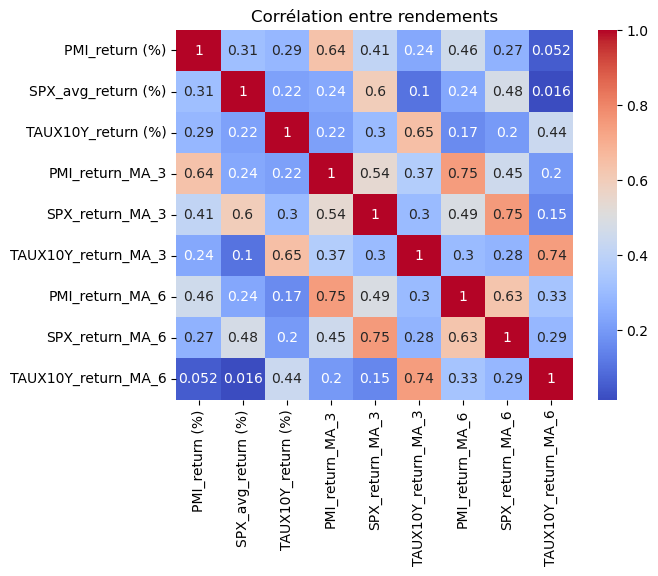

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corrélation entre rendements')
plt.show()


In [100]:
import numpy as np
from scipy.optimize import minimize

# Colonnes à utiliser (rendements + MA 3 mois + MA 6 mois)
cols = [
    'PMI_return (%)', 'TAUX10Y_return (%)',
    'PMI_return_MA_3', 'TAUX10Y_return_MA_3',
    'PMI_return_MA_6', 'TAUX10Y_return_MA_6'
]

# Supprimer les lignes avec NaN dans les colonnes concernées
mask = df[cols + ['SPX_avg_return (%)']].dropna().index

# Variables explicatives et cible
X = df.loc[mask, cols].values
y = df.loc[mask, 'SPX_avg_return (%)'].values

# Fonction objectif : corrélation négative à minimiser
def neg_corr(coefs):
    score = np.dot(X, coefs)
    corr = np.corrcoef(score, y)[0, 1]
    return -corr  # On veut maximiser la corrélation

# Initialisation des coefficients
init_coefs = np.ones(X.shape[1])

# Optimisation
res = minimize(neg_corr, init_coefs, method='Nelder-Mead')

# Résultats optimisés
coefs_opt = res.x
corr_opt = -res.fun

# Affichage
print("✅ Coefficients optimaux :")
for name, coef in zip(cols, coefs_opt):
    print(f"  {name}: {coef:.4f}")
print(f"\n📈 Corrélation maximale obtenue avec SPX : {corr_opt:.4f}")

# Calcul du score optimal et ajout dans le DataFrame
df.loc[mask, 'Score_PMI_Yield_MA'] = np.dot(X, coefs_opt)


✅ Coefficients optimaux :
  PMI_return (%): 1.8826
  TAUX10Y_return (%): 0.8364
  PMI_return_MA_3: -0.5373
  TAUX10Y_return_MA_3: -0.2301
  PMI_return_MA_6: 3.2817
  TAUX10Y_return_MA_6: -0.8481

📈 Corrélation maximale obtenue avec SPX : 0.3767


C:\Users\malu\AppData\Local\Temp\ipykernel_12968\2188312611.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[mask, 'Score_PMI_Yield_MA'] = np.dot(X, coefs_opt)


In [101]:
# Calcul du score macro avec les coefficients optimisés
df['score_macro'] = (
    1.8826 * df['PMI_return (%)'] +
    0.8364 * df['TAUX10Y_return (%)'] +
   -0.5373 * df['PMI_return_MA_3'] +
   -0.2301 * df['TAUX10Y_return_MA_3'] +
    3.2817 * df['PMI_return_MA_6'] +
   -0.8481 * df['TAUX10Y_return_MA_6']
)
df

C:\Users\malu\AppData\Local\Temp\ipykernel_12968\1030361194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score_macro'] = (


,DATE,PMI,SPX_avg,TAUX10Y,PMI_return (%),SPX_avg_return (%),TAUX10Y_return (%),PMI_return_MA_3,SPX_return_MA_3,TAUX10Y_return_MA_3,PMI_return_MA_6,SPX_return_MA_6,TAUX10Y_return_MA_6,Score_PMI_Yield_MA,score_macro
6,1999-07,53.698159,1380.990002,5.777048,2.406044,4.418521,-1.896498,1.590101,1.167589,3.884349,1.821991,1.713985,3.521654,4.187681,4.187751
7,1999-08,54.484217,1327.488653,5.931409,1.463845,-3.874130,2.671978,1.967695,-0.056793,2.436536,1.671603,1.097560,2.989264,6.323038,6.323291
8,1999-09,55.550755,1318.171904,5.902905,1.957518,-0.701833,-0.480566,1.942469,-0.052481,0.098305,1.687095,0.511548,2.137220,5.940915,5.940934
9,1999-10,57.090458,1300.010010,6.099050,2.771704,-1.377809,3.322860,2.064356,-1.984591,1.838091,1.827229,-0.408501,2.861220,10.034713,10.034942
10,1999-11,57.324011,1391.002848,6.018850,0.409093,6.999395,-1.314958,1.712771,1.639918,0.509112,1.840233,0.791562,1.472824,3.422885,3.422900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2025-03,47.600000,5683.983352,4.277762,2.145923,-5.873900,-3.840951,1.741287,-1.802183,-0.776785,1.025019,0.229642,2.490710,1.322076,1.321921
315,2025-04,48.600000,5369.495722,4.272048,2.100840,-5.532874,-0.133580,2.146582,-3.472385,-2.613981,1.040338,-1.199682,0.795964,6.030534,6.030453
316,2025-05,49.000000,5810.919480,4.427238,0.823045,8.220954,3.632695,1.689936,-1.061940,-0.113945,1.068103,-0.225440,0.334785,6.927166,6.927329
317,2025-06,49.400000,6029.951514,4.381450,0.816327,3.769318,-1.034236,1.246737,2.152466,0.821626,1.494012,0.175142,0.022421,4.696770,4.696738


C:\Users\malu\AppData\Local\Temp\ipykernel_12968\2128886695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SPX_return_next'] = df['SPX_avg_return (%)'].shift(-1)
C:\Users\malu\AppData\Local\Temp\ipykernel_12968\2128886695.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = df['score_macro'].apply(signal)
C:\Users\malu\AppData\Local\Temp\ipykernel_12968\2128886695.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

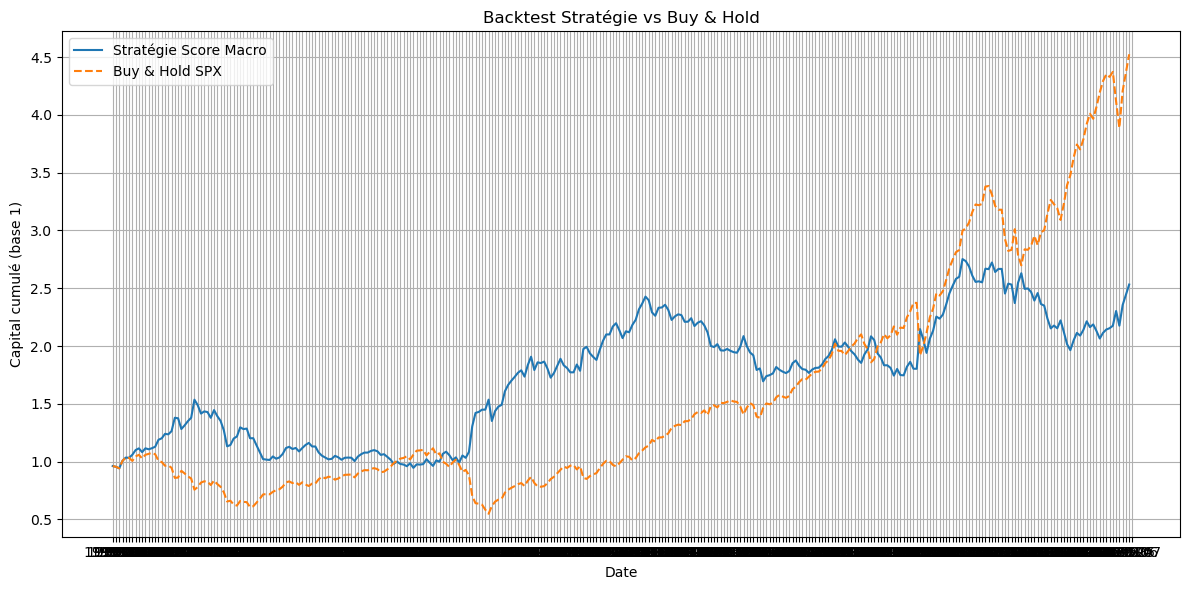

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Décaler les rendements du SPX pour prédire le mois suivant
df['SPX_return_next'] = df['SPX_avg_return (%)'].shift(-1)

# Définir une stratégie simple basée sur des seuils du score
def signal(score):
    if score > 0.7:
        return 1  # Long
    elif score < 0.3:
        return -1  # Short
    else:
        return 0  # Neutre

df['position'] = df['score_macro'].apply(signal)

# Calcul du rendement de la stratégie
df['strategy_return'] = df['position'] * df['SPX_return_next']

# Calcul du rendement buy & hold
df['buy_hold_return'] = df['SPX_return_next']

# Calcul des rendements cumulés
df['cumulative_strategy'] = (1 + df['strategy_return'] / 100).cumprod()
df['cumulative_buy_hold'] = (1 + df['buy_hold_return'] / 100).cumprod()

# Tracer les courbes
plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['cumulative_strategy'], label='Stratégie Score Macro')
plt.plot(df['DATE'], df['cumulative_buy_hold'], label='Buy & Hold SPX', linestyle='--')
plt.title('Backtest Stratégie vs Buy & Hold')
plt.xlabel('Date')
plt.ylabel('Capital cumulé (base 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
# Nettoyage des NaN pour éviter erreurs
valid = df['strategy_return'].dropna()

sharpe_ratio = valid.mean() / valid.std() * np.sqrt(12)
hit_ratio = (valid > 0).mean()

print(f"Sharpe Ratio de la stratégie : {sharpe_ratio:.2f}")
print(f"Taux de mois gagnants : {hit_ratio:.2%}")


Sharpe Ratio de la stratégie : 0.34
Taux de mois gagnants : 51.28%
